### Telco Customer Churn
#### Focused customer retention programs

### Context
* "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

### Content
* Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

### The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents
### Inspiration
* To explore this type of models and learn more about the subject.

Note : The dataset has been taken from [kaggle dataset](https://www.kaggle.com/blastchar/telco-customer-churn/download) 

### Explore the datasets

### Load the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Explore the dataset

In [2]:
telco_customer_data = pd.read_csv('data/Telco-Customer-Churn.csv',index_col='customerID')

In [3]:
telco_customer_data.shape

(7043, 20)

In [4]:
telco_customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

### Details Info 
* <b> customerID:</b>      Customer ID
* <b> gender:</b>        Whether the customer is a male or a female
* <b> SeniorCitizen:</b>      Whether the customer is a senior citizen or not (1, 0)
* <b> Partner:</b>  	   Whether the customer has a partner or not (Yes, No)
* <b> Dependents:</b>       Whether the customer has dependents or not (Yes, No)
* <b> Tenure:</b>       Number of months the customer has stayed with the company
* <b> PhoneService:</b>      Whether the customer has a phone service or not (Yes, No)
* <b> MultipleLines:</b>     Whether the customer has multiple lines or not (Yes, No, No phone service)
* <b> InternetService:</b>       Customer’s internet service provider (DSL, Fiber optic, No)
* <b> OnlineSecurity:</b>     Whether the customer has online security or not (Yes, No, No internet service)
* <b> OnlineBackup:</b>     Whether the customer has online backup or not (Yes, No, No internet service)
* <b> DeviceProtection:</b>     Whether the customer has device protection or not (Yes, No, No internet service)
* <b> TechSupport:</b>     Whether the customer has tech support or not (Yes, No, No internet service)
* <b> StreamingTV:</b>     Whether the customer has streaming TV or not (Yes, No, No internet service)
* <b> StreamingMovies:</b>     Whether the customer has streaming movies or not (Yes, No, No internet ser
* <b> Contract:</b>     The contract term of the customer (Month-to-month, One year, Two year)
* <b> PaperlessBilling:</b>     Whether the customer has paperless billing or not (Yes, No)
* <b> PaymentMethod:</b>    The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* <b> MonthlyCharges:</b>    The amount charged to the customer monthly
* <b> TotalCharges:</b>    The total amount charged to the customer
* <b> Churn:</b>    Whether the customer churned or not (Yes or No)


In [5]:
telco_customer_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
#change intial letter to Caps to match all the other coluns

telco_customer_data = telco_customer_data.rename(columns={'customerID' : 'CustomerID' , 'gender': 'Gender', 'tenure':'Tenure'})
print(telco_customer_data.columns.values)

['Gender' 'SeniorCitizen' 'Partner' 'Dependents' 'Tenure' 'PhoneService'
 'MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup'
 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod' 'MonthlyCharges'
 'TotalCharges' 'Churn']


In [7]:
telco_customer_data.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
telco_customer_data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
telco_customer_data.head(2).T

customerID,7590-VHVEG,5575-GNVDE
Gender,Female,Male
SeniorCitizen,0,0
Partner,Yes,No
Dependents,No,No
Tenure,1,34
PhoneService,No,Yes
MultipleLines,No phone service,No
InternetService,DSL,DSL
OnlineSecurity,No,Yes
OnlineBackup,Yes,No


In [10]:
telco_customer_data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1. Ideas and Proposal

#### Target Variable or The variable we want to predict is 'Churn'

#### Feature Variable - All Other columns (First 20 columnns)

* Customers who left within the last month – 'Churn'
* Customer Services – 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup' 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
* Customer Account information – 'Tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'
* Customer Personal Information – 'Gender', 'SeniorCitizen', 'Partner', 'Dependents

### 2. Data Wrangling

#### Total charges is an object variable, change to float .

In [11]:
telco_customer_data['TotalCharges'] =telco_customer_data['TotalCharges'].replace('\s+',np.nan,regex=True)
telco_customer_data['TotalCharges'] = pd.to_numeric(telco_customer_data['TotalCharges'])

In [12]:
telco_customer_data['TotalCharges'].dtypes

dtype('float64')

### 3. Exapolatory Data Analysis

In [13]:
## shortcut to EDA using pandas_profiling
#from pandas_profiling import ProfileReport
# import pandas_profiling

In [14]:
# dir(pandas_profiling)
# dir(ProfileReport)
#telco_eda =ProfileReport(telco_customer_data,title='Pandas Profiling Report', explorative=True)
#telco_eda

In [15]:
#telco_eda_file =telco_eda.to_file('telco_ed.html')

<AxesSubplot:>

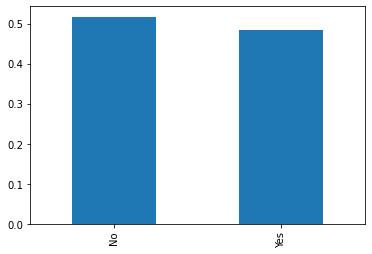

In [16]:
telco_customer_data.Partner.value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:>

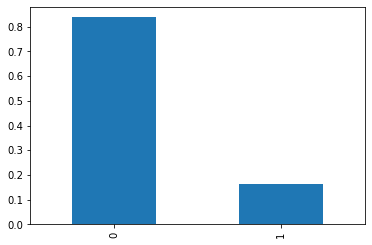

In [17]:
telco_customer_data.SeniorCitizen.value_counts(normalize=True).plot(kind='bar') #label

<AxesSubplot:>

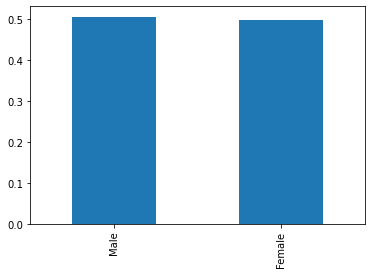

In [18]:
telco_customer_data.Gender.value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:>

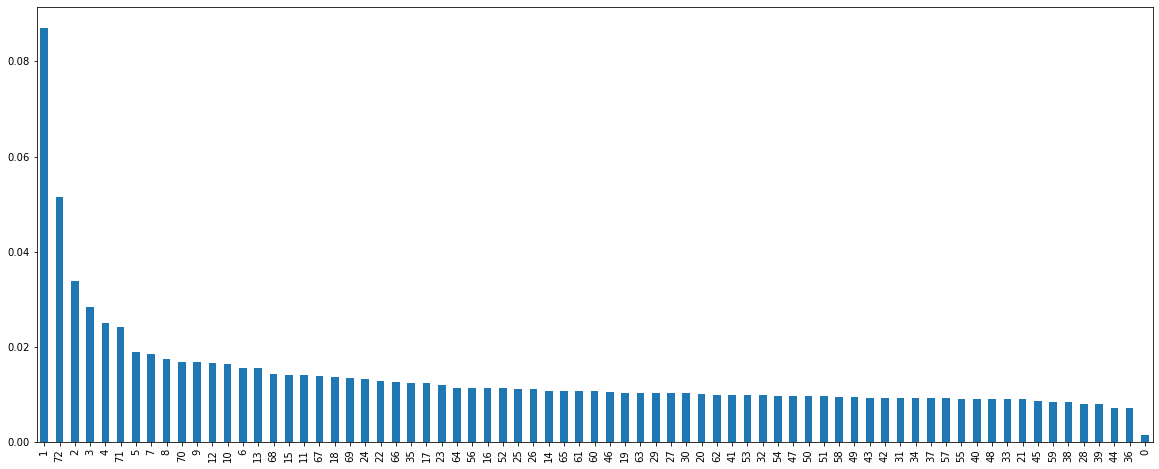

In [19]:
telco_customer_data.Tenure.value_counts(normalize=True).plot(kind='bar',figsize=(20,8))
#change to range bins



In [20]:
#Tenure is months of employement in the company

tenure_df = pd.cut(telco_customer_data.Tenure,bins=[0,10,20,30,40,50,60,70,80],
       labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'],retbins=True)

tenure_df

(customerID
 7590-VHVEG     0-10
 5575-GNVDE    30-40
 3668-QPYBK     0-10
 7795-CFOCW    40-50
 9237-HQITU     0-10
               ...  
 6840-RESVB    20-30
 2234-XADUH    70-80
 4801-JZAZL    10-20
 8361-LTMKD     0-10
 3186-AJIEK    60-70
 Name: Tenure, Length: 7043, dtype: category
 Categories (8, object): ['0-10' < '10-20' < '20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80'],
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80]))

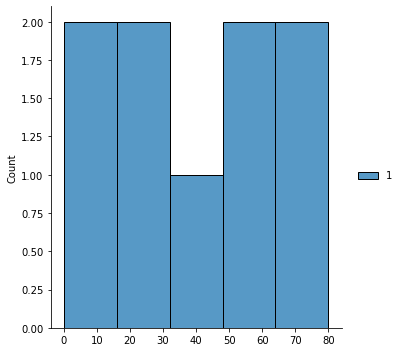

In [21]:
sns.displot(tenure_df)

<AxesSubplot:>

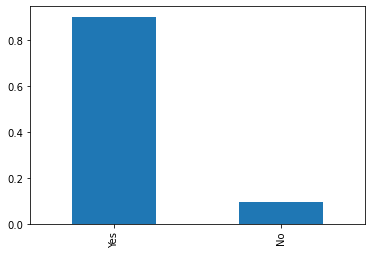

In [22]:
telco_customer_data.PhoneService.value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:>

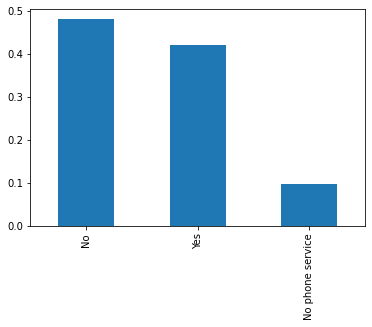

In [23]:
telco_customer_data.MultipleLines.value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:>

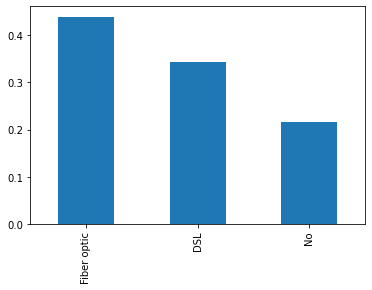

In [24]:
telco_customer_data.InternetService.value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:>

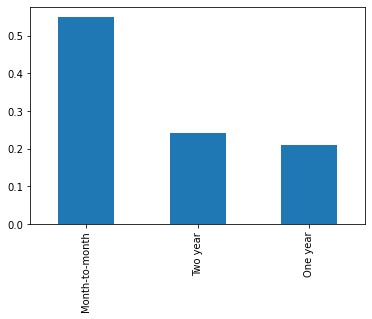

In [25]:
telco_customer_data.Contract.value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:>

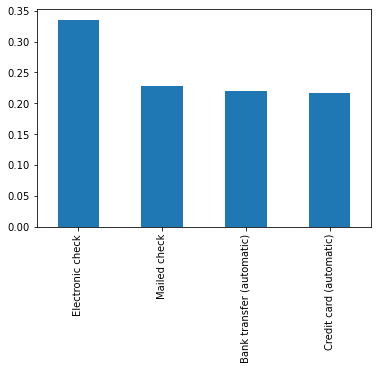

In [26]:
telco_customer_data.PaymentMethod.value_counts(normalize=True).plot(kind='bar')

### Plot variables wrt Target variables

<AxesSubplot:>

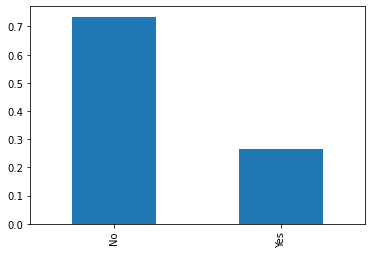

In [27]:
telco_customer_data.Churn.value_counts(normalize=True).plot(kind='bar')

Churn     No   Yes   All
Gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043


<AxesSubplot:xlabel='Gender'>

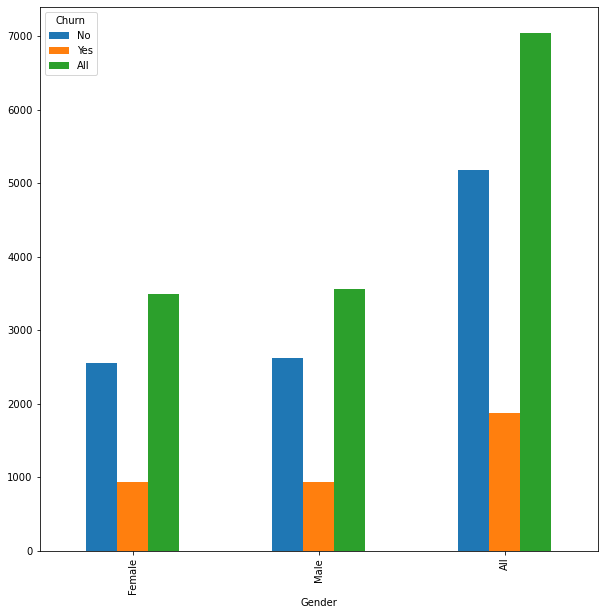

In [28]:
## Comparison
#Gender vs churn 
print(pd.crosstab(telco_customer_data.Gender,telco_customer_data.Churn,margins=True))
pd.crosstab(telco_customer_data.Gender,telco_customer_data.Churn,margins=True).plot(kind='bar',figsize=(10,10))

In [29]:
##Ratioswise
print("percent of males left the company {0}".format((939/1869)*100))
print("percent of males left the company {0}".format((930/1869)*100))

percent of males left the company 50.24077046548957
percent of males left the company 49.75922953451043


#### So conclude that  Gender doesnot impact in predict the target varoiable Churn

Churn             No   Yes   All
Contract                        
Month-to-month  2220  1655  3875
One year        1307   166  1473
Two year        1647    48  1695
All             5174  1869  7043


<AxesSubplot:xlabel='Contract'>

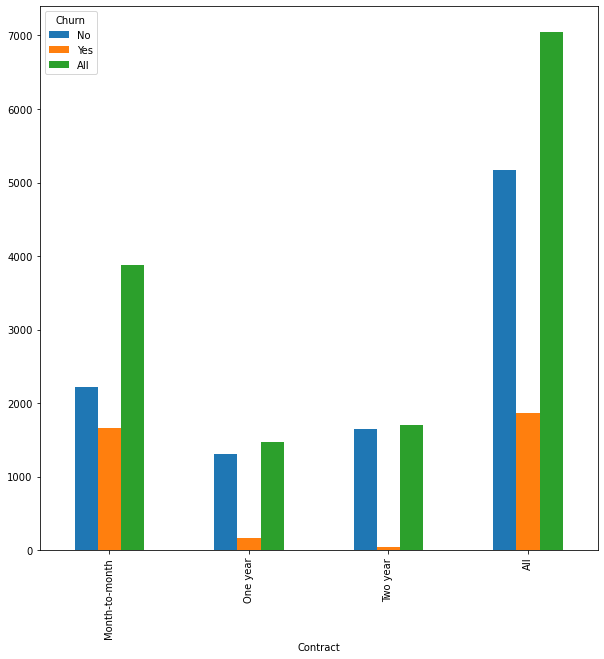

In [30]:
#contract vs churn
 
print(pd.crosstab(telco_customer_data.Contract,telco_customer_data.Churn,margins=True))
pd.crosstab(telco_customer_data.Contract,telco_customer_data.Churn,margins=True).plot(kind='bar',figsize=(10,10))

In [31]:
##Ratioswise
print("percent of Month-to-Month contact people left the company {0}".format((1655/3875)*100))
print("percent of one-Year Contract people left the company {0}".format((166/1473)*100))
print("percent of Two-Year Contract people left the company {0}".format((48/1695)*100))

percent of Month-to-Month contact people left the company 42.70967741935484
percent of one-Year Contract people left the company 11.269517990495586
percent of Two-Year Contract people left the company 2.831858407079646


#### Most people 43% approx left were on mothly basis contract

Churn              No   Yes   All
InternetService                  
DSL              1962   459  2421
Fiber optic      1799  1297  3096
No               1413   113  1526
All              5174  1869  7043


<AxesSubplot:xlabel='InternetService'>

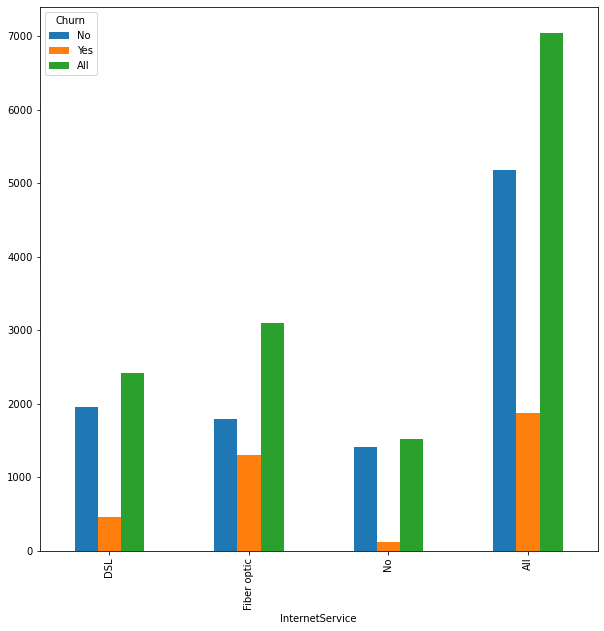

In [32]:
#contract vs churn
 
print(pd.crosstab(telco_customer_data.InternetService,telco_customer_data.Churn,margins=True))
pd.crosstab(telco_customer_data.InternetService,telco_customer_data.Churn,margins=True).plot(kind='bar',figsize=(10,10))

In [33]:
##Ratioswise
print("percent of DSL internet service people left the company {0}".format((459/2421)*100))
print("percent of Fiber optic internet service peopl people left the company {0}".format((1297/3096)*100))
print("percent of No Internet service people left the company {0}".format((113/1526)*100))

percent of DSL internet service people left the company 18.95910780669145
percent of Fiber optic internet service peopl people left the company 41.89276485788114
percent of No Internet service people left the company 7.404980340760157


#### Most people who left who were using optical fiber internet services

Churn    No   Yes
row_0            
29.0   5174  1869


<AxesSubplot:xlabel='row_0'>

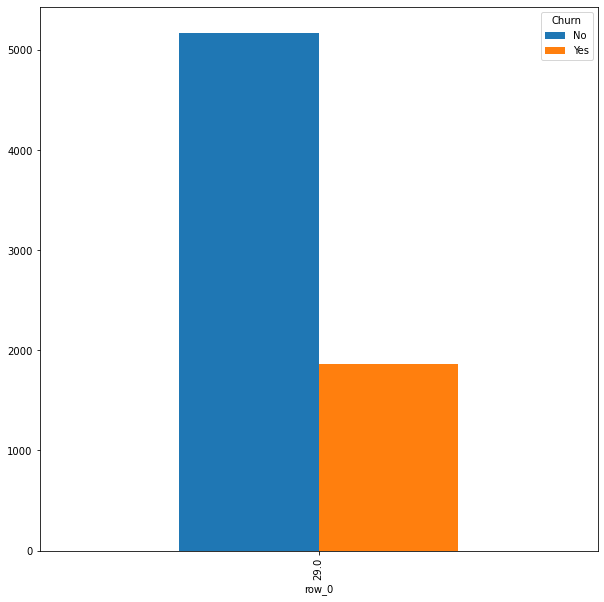

In [34]:
# Tenure median vs churn
print(pd.crosstab(telco_customer_data.Tenure.median(),telco_customer_data.Churn))
pd.crosstab(telco_customer_data.Tenure.median(),telco_customer_data.Churn).plot(kind='bar',figsize=(10,10))

Dependents    No   Yes   All
Partner                     
No          3280   361  3641
Yes         1653  1749  3402
All         4933  2110  7043


<AxesSubplot:xlabel='Partner'>

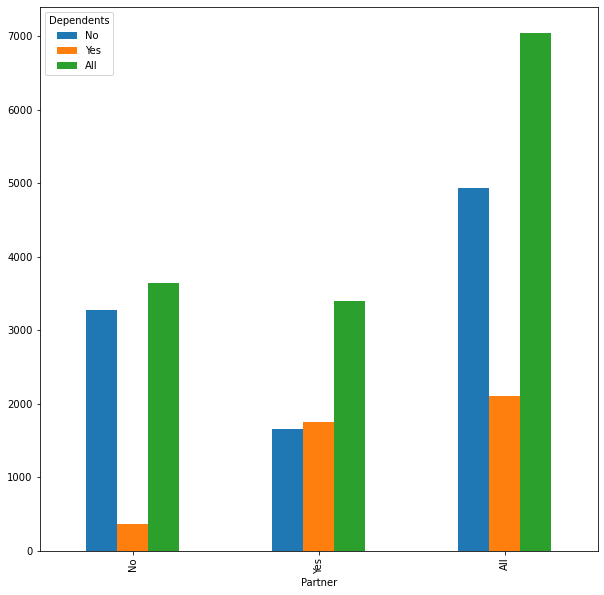

In [35]:
#Partners vs dependents
print(pd.crosstab(telco_customer_data.Partner,telco_customer_data.Dependents,margins=True))
pd.crosstab(telco_customer_data.Partner,telco_customer_data.Dependents,margins=True).plot(kind='bar',figsize=(10,10))

In [36]:
##Ratioswise
print("percent of partners had dependants {0}".format((1749/2110)*100))
print("percent of Non partners had dependants {0}".format((361/2110)*100))

percent of partners had dependants 82.8909952606635
percent of Non partners had dependants 17.10900473933649


#### Partners had more percent of dependants that non-partners

Churn      No   Yes   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043


<AxesSubplot:xlabel='Partner'>

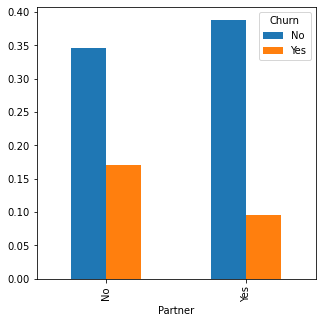

In [37]:
# Partner vs churn
print(pd.crosstab(telco_customer_data.Partner,telco_customer_data.Churn,margins=True))
pd.crosstab(telco_customer_data.Partner,telco_customer_data.Churn,normalize=True).plot(kind='bar',figsize=(5,5) )

<AxesSubplot:xlabel='Tenure', ylabel='count'>

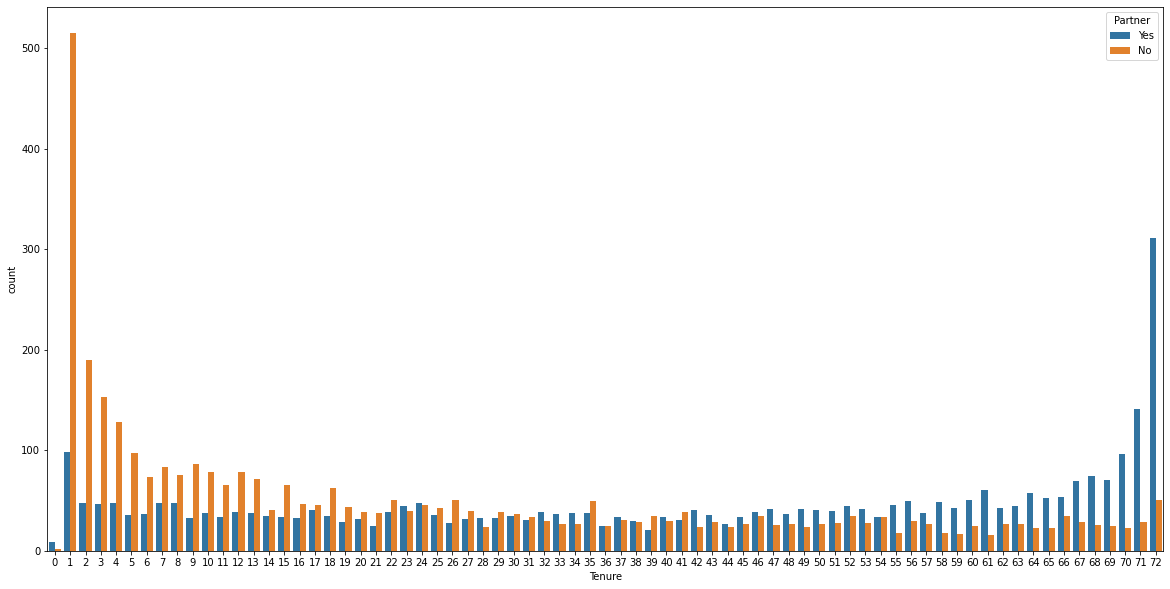

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(x=telco_customer_data['Tenure'],hue=telco_customer_data.Partner)

Churn            No   Yes   All
SeniorCitizen                  
0              4508  1393  5901
1               666   476  1142
All            5174  1869  7043


<AxesSubplot:xlabel='SeniorCitizen'>

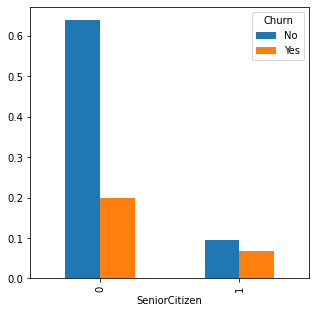

In [39]:
#senior Citizen vs Churn 
# Partner vs churn
print(pd.crosstab(telco_customer_data.SeniorCitizen,telco_customer_data.Churn,margins=True))
pd.crosstab(telco_customer_data.SeniorCitizen,telco_customer_data.Churn,normalize=True).plot(kind='bar',figsize=(5,5) )

#### Monthly charges vs churn

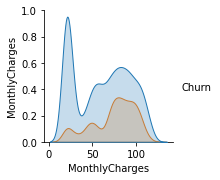

In [40]:
#pd.crosstab(telco_customer_data.MonthlyCharges,telco_customer_data.Churn,normalize=True).plot(kind='bar',figsize=(5,5))

sns.pairplot(telco_customer_data,vars=['MonthlyCharges'],hue='Churn')

<AxesSubplot:>

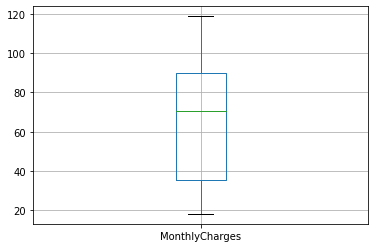

In [41]:
#Check for outliers in monthly Charges and total Chjarges
telco_customer_data.boxplot('MonthlyCharges')


<AxesSubplot:>

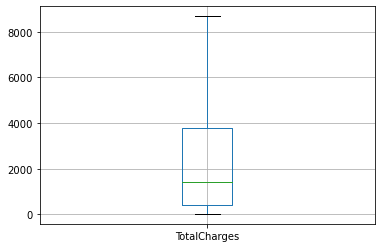

In [42]:
telco_customer_data.boxplot('TotalCharges')

#### monthly charges and Total Charges dont have any outliers so not to extract info from outliers

In [43]:
telco_customer_data.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Correlation Matrix

<AxesSubplot:>

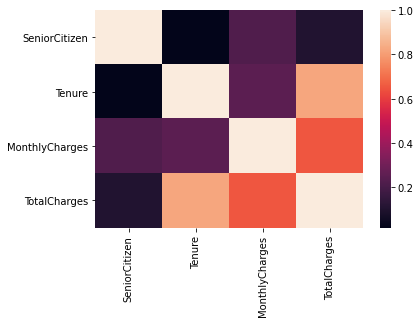

In [44]:
##E coreelation matrix using seaborn
sns.heatmap(telco_customer_data.corr(),xticklabels=telco_customer_data.corr().columns.values,yticklabels=telco_customer_data.corr().columns.values)

#### here Tenure and Total charges are correlated and Monthly charges and Total charges are also correlated. so Total charges = Montly charges * tenure +Addn Tax taken

In [45]:
#check for null 
telco_customer_data.isnull().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### 11 Null in Total charges, so fill them

In [46]:
telco_customer_data.head(15)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [47]:
fill = telco_customer_data.MonthlyCharges * telco_customer_data.Tenure

In [48]:
telco_customer_data.TotalCharges.fillna(fill,inplace=True)

In [49]:
telco_customer_data.isnull().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Now NO null any values

## When churn is "YES"

In [50]:
telco_customer_data.loc[(telco_customer_data.Churn=='Yes'),'MonthlyCharges'].mean()

74.4413322632423

In [51]:
telco_customer_data.loc[(telco_customer_data.Churn=='Yes'),'TotalCharges'].median()

703.55

In [52]:
telco_customer_data.loc[(telco_customer_data.Churn=='Yes'),'Tenure'].median()

10.0

In [53]:
telco_customer_data.loc[(telco_customer_data.Churn=='Yes'),'PaymentMethod'].value_counts(normalize=True)*100

Electronic check             57.303371
Mailed check                 16.479401
Bank transfer (automatic)    13.804173
Credit card (automatic)      12.413055
Name: PaymentMethod, dtype: float64

#### Most people left were had Electronic Check as payment method

In [54]:
#telco_customer_data['Is_Electronic_check']=np.where(telco_customer_data['PaymentMethod'] =='Electronic check')

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

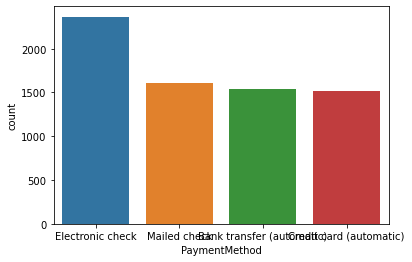

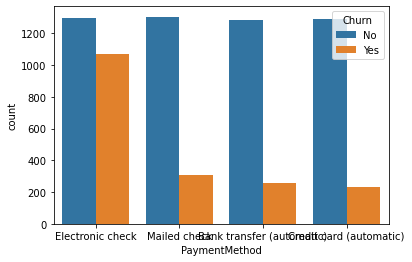

In [55]:
plt.figure()
sns.countplot(x="PaymentMethod", data=telco_customer_data)
plt.figure()
sns.countplot(x="PaymentMethod", hue="Churn", data=telco_customer_data)

### 4. Pre-processing & Training Data Development

In [56]:
## CustomerID not required in prediction , so drop it.
#telco_customer_data.drop("CustomerID")

In [57]:
from sklearn.preprocessing import LabelEncoder # Churn to numeric value
label_encoder = LabelEncoder()
telco_customer_data['Churn'] = label_encoder.fit_transform(telco_customer_data.Churn)

In [58]:
telco_df =pd.get_dummies(telco_customer_data)

In [59]:
X = telco_df.drop('Churn',axis=1)

In [60]:
y = telco_df['Churn']

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### spliting the data into training and development

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)

### 5 : Modeling

#### prediction using Logistic Regression


In [63]:
lm = LogisticRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
lm_accuracy = round(lm.score(X_test,y_test)*100,2)
print('Test accuracy:',lm_accuracy)


Test accuracy: 81.45


In [64]:
from sklearn.metrics import confusion_matrix,recall_score
cm_lr = confusion_matrix(y_test,y_pred)
print("confusion_matrix:\n",cm_lr)

confusion_matrix:
 [[1406  174]
 [ 218  315]]


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1580
           1       0.64      0.59      0.62       533

    accuracy                           0.81      2113
   macro avg       0.75      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113



In [66]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.754967662969567, 0.7404338946018476, 0.7470456449985463, None)

#### Prediction using KNN

In [67]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = round(knn.score(X_test, y_test) * 100, 2)
print('Test Accuracy: ', knn_accuracy)

Test Accuracy:  78.04


In [68]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test,y_pred)
print("cconfusion_matrix:\n",cm_knn)

cconfusion_matrix:
 [[1384  196]
 [ 268  265]]


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1580
           1       0.57      0.50      0.53       533

    accuracy                           0.78      2113
   macro avg       0.71      0.69      0.69      2113
weighted avg       0.77      0.78      0.77      2113



#### Prediction using Support Vector Classifier

In [70]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_accuracy = round(svc.score(X_test, y_test) * 100, 2)
print('Test Accuracy: ', svc_accuracy)

Test Accuracy:  74.78


In [71]:
from sklearn.metrics import confusion_matrix
cm_svc = confusion_matrix(y_test,y_pred)
print("confusion_matrix:\n",cm_svc)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

confusion_matrix:
 [[1580    0]
 [ 533    0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1580
           1       0.00      0.00      0.00       533

    accuracy                           0.75      2113
   macro avg       0.37      0.50      0.43      2113
weighted avg       0.56      0.75      0.64      2113



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Prediction using Decision Tree

In [72]:
dt = DecisionTreeClassifier(max_depth =10)
dt.fit(X_train,y_train)
y_pred =dt.predict(X_test)
dt_accuracy = round(dt.score(X_test,y_test)*100,2)
print("Test accuracy:",dt_accuracy)

Test accuracy: 76.05


In [73]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test,y_pred)
print("cconfusion_matrix:\n",cm_dt)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

cconfusion_matrix:
 [[1308  272]
 [ 234  299]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1580
           1       0.52      0.56      0.54       533

    accuracy                           0.76      2113
   macro avg       0.69      0.69      0.69      2113
weighted avg       0.77      0.76      0.76      2113



#### Prediction using RandomForest

In [74]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred =rf.predict(X_test)
rf_accuracy = round(rf.score(X_test,y_test)*100,2)
print("Test accuracy:",rf_accuracy)

Test accuracy: 79.37


In [75]:
from sklearn.metrics import confusion_matrix
cm_rm = confusion_matrix(y_test,y_pred)
print("confusion_matrix:\n",cm_rm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

confusion_matrix:
 [[1398  182]
 [ 254  279]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1580
           1       0.61      0.52      0.56       533

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.79      0.79      0.79      2113



### Conclusion:  The logistic regression has 81.45 accuracy which is high than others. so that model is more suitabale than the others.